In [15]:
%run functions.py

import numpy as np
import pandas as pd
from scipy.io import loadmat
import pickle

from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings

# Task 3 - Regression 

## Load settings

In [16]:
grid = None
k=10 # Define k for crossvalidation
seed = 42 # Seed to use
feature_tot = 0 # Total selected features -> Start at 0 before PCA
taskname = "task3"
filedir = "/home/fredrik/Documents/Learning_systems/Labs/Project/"
#filedir = "C:/Users/fredr/Documents/github-projects/Learning_systems/Labs/Project/"

scoring='neg_mean_squared_error' # Scoring method for GridsearchCV
score_function = f_regression # Score function for Feature selection


np.random.seed(seed) # Define the random seed

In [17]:
# GridSearchCV
estimators = [
    ('clf', 'passthrough'),
]
param_grid = [
    {
        'clf':[SVR()],
        'clf__C':[0.1,10,100],
        'clf__gamma':['scale', 'auto',2]
    },{
        'clf':[Lasso(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,1000,5000],

    },{
        'clf':[ElasticNet(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,1000,5000],
    },{
        'clf':[RandomForestRegressor(random_state=seed)],  
        'clf__n_estimators':[100,150,200],
        
    },{
        'clf':[MLPRegressor()],
        'clf__hidden_layer_sizes':[(100,20)],
        'clf__activation':['relu'],
        'clf__solver':['adam', 'lbfgs'],
        'clf__alpha':[0.0001,0.001,0.1],
        'clf__max_iter':[200,400],
        'clf__early_stopping':[True, False]
    }
]

## Load dataset

In [18]:
filename = "datasets/powerTrainData.mat"

mat = loadmat(filename)
input_train = mat['powerTrainInput'].T

target_train = mat['powerTrainOutput'].reshape(len(input_train))
input_test = mat['powerTestInput'].T

## Data info

In [19]:
get_data_info(input_train, target_train)

Length of 844
X.shape: (844, 15) y.shape: (844,)
Contains Nan: False False
Contains +inf: False False
Contains -inf: False False


## Preprocess
Normalize the dataset

In [20]:
input_train, input_test, target_train, input_train_copy, input_train_copy_normalized = preprocessing(input_train,target_train, input_test)

Length of input: 844


## Feature distribution

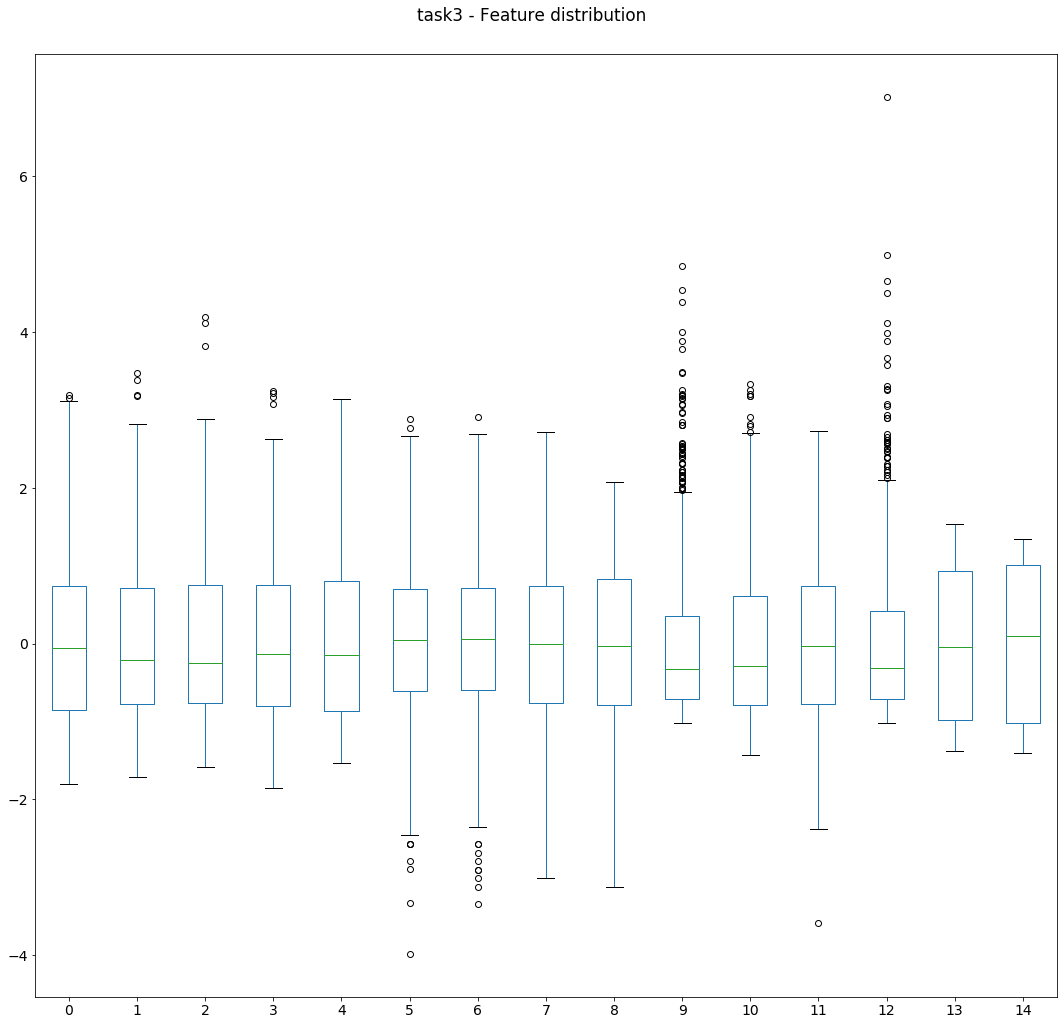

In [21]:
plot_feature_distribution(input_train, filedir=filedir, taskname=taskname)

## Feature reduction
Reduce dimensionality by PCA transform

In [22]:
feature_tot, pca, pca_input = feature_reduction(input_train, target_train,input_train_copy)

original shape:    (844, 15)
transformed shape: (844, 6)
Explained variance: [0.71291343 0.08305948 0.06661705 0.04012179 0.03533515 0.02463563]


## Feature extraction

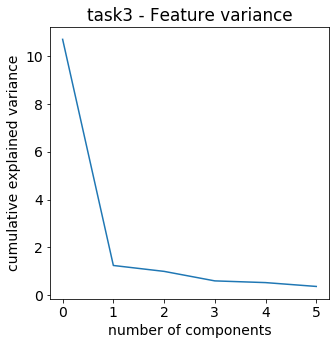

In [23]:
plot_feature_variance(pca_input, filedir=filedir, taskname=taskname)

## Feature selection
Extract top features above depending on PCA

[ 0  1  2  3  4 11]
Shape of input: (844, 15)


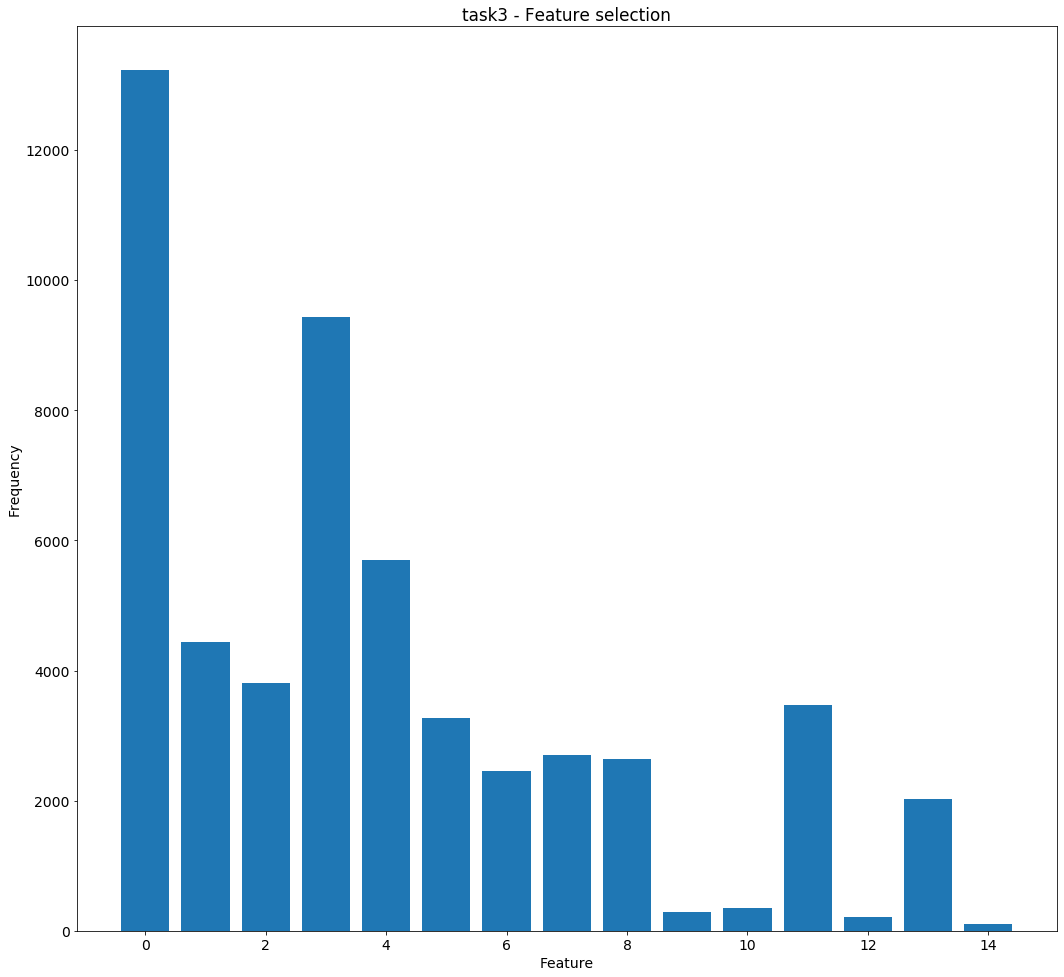

In [24]:
input_train_fs, input_test_fs = feature_selection(score_function, input_train, target_train, input_test, filedir=filedir, taskname=taskname,feature_tot=feature_tot)

## Feature Relationship

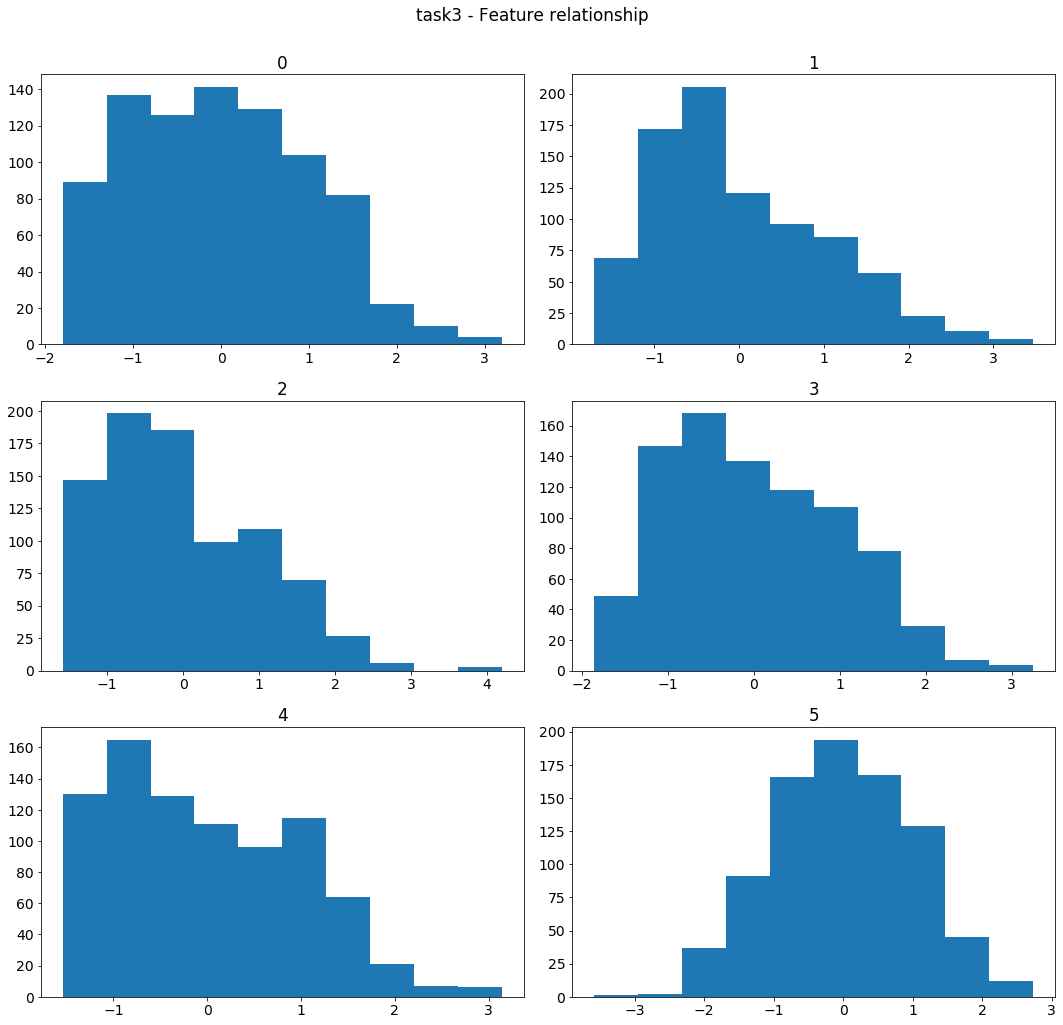

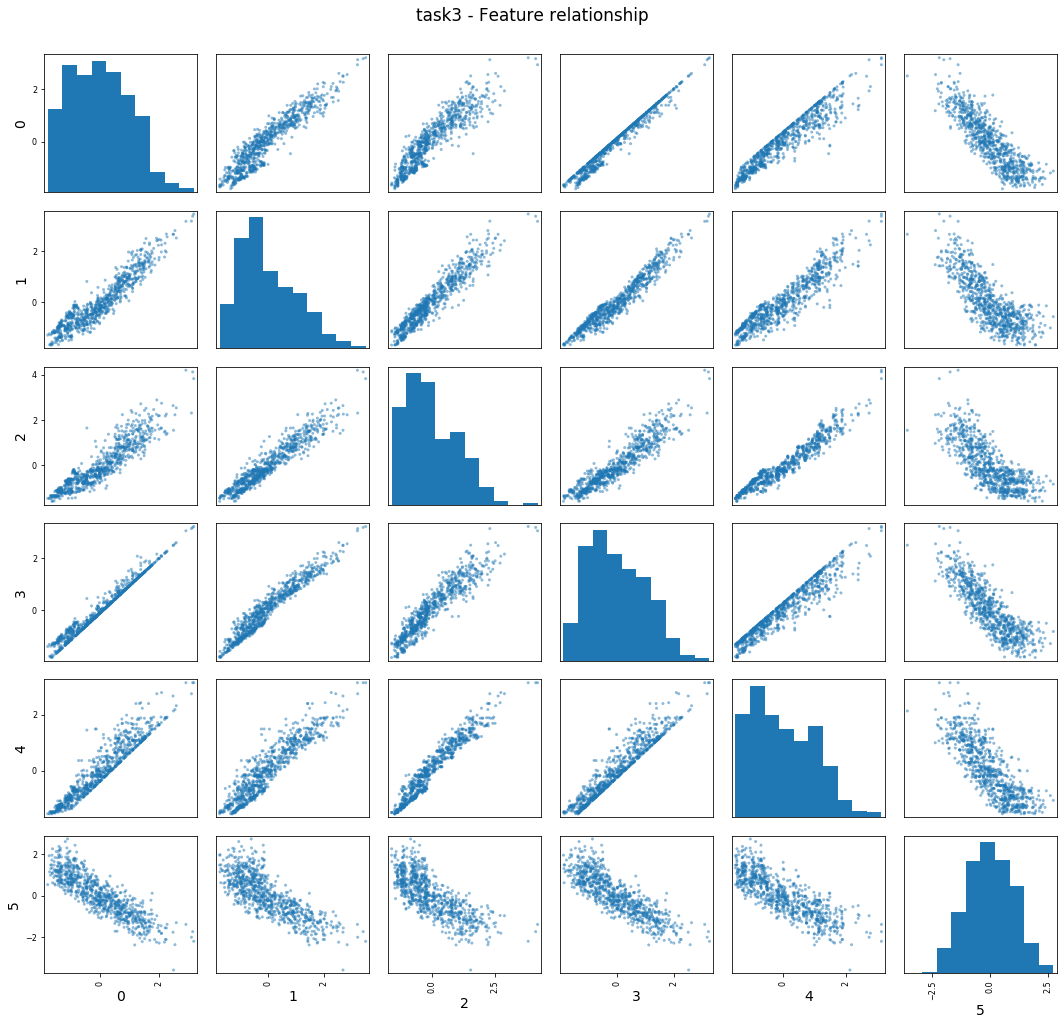

In [25]:
plot_feature_relationship(input_train_fs, filedir, taskname)

## Hyperparameter tuning

In [26]:
# GridSearchCV
grid = parameter_tuning(estimators, param_grid, input_train_fs, target_train, scoring=scoring, k=k)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.5min finished


## Save model

In [27]:
save_model(grid, filedir=filedir, taskname=taskname)

Save model into: /home/fredrik/Documents/Learning_systems/Labs/Project/Models/task3.joblib


## Load model

In [28]:
if not grid: 
    grid = load_model(filedir=filedir, taskname=taskname)

## Get Model info

In [29]:
get_model_info(grid)

    mean_test_score  std_test_score  rank_test_score  \
37    -11045.390588     3365.367820                1   
53    -11070.896047     3156.145822                2   
57    -11132.070579     3186.454146                3   
41    -11146.364063     3122.681592                4   
49    -11212.381375     3420.469817                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

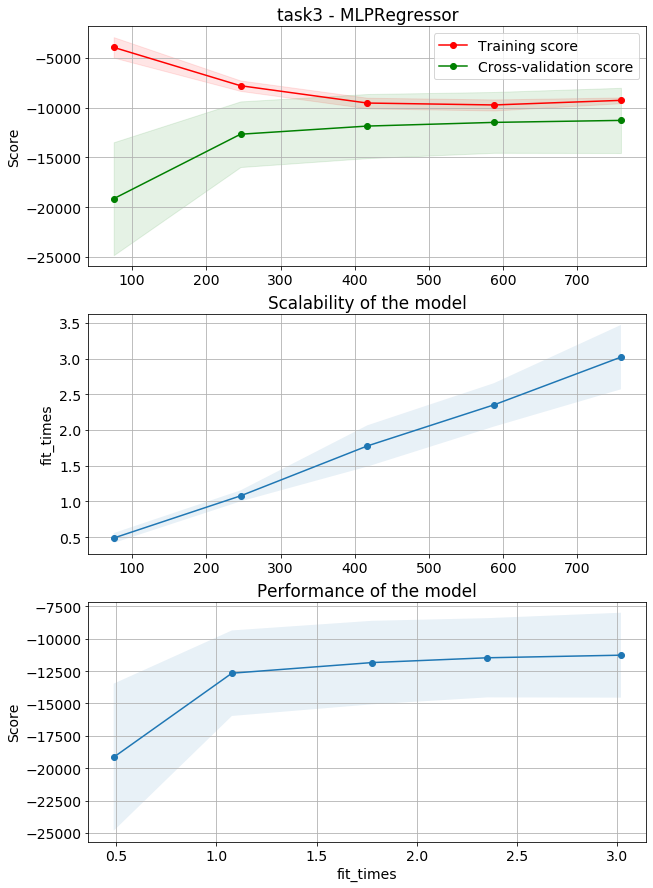

In [30]:
validate_curve(grid, input_train_fs, target_train, filedir=filedir, taskname=taskname,scoring=scoring, k=k)

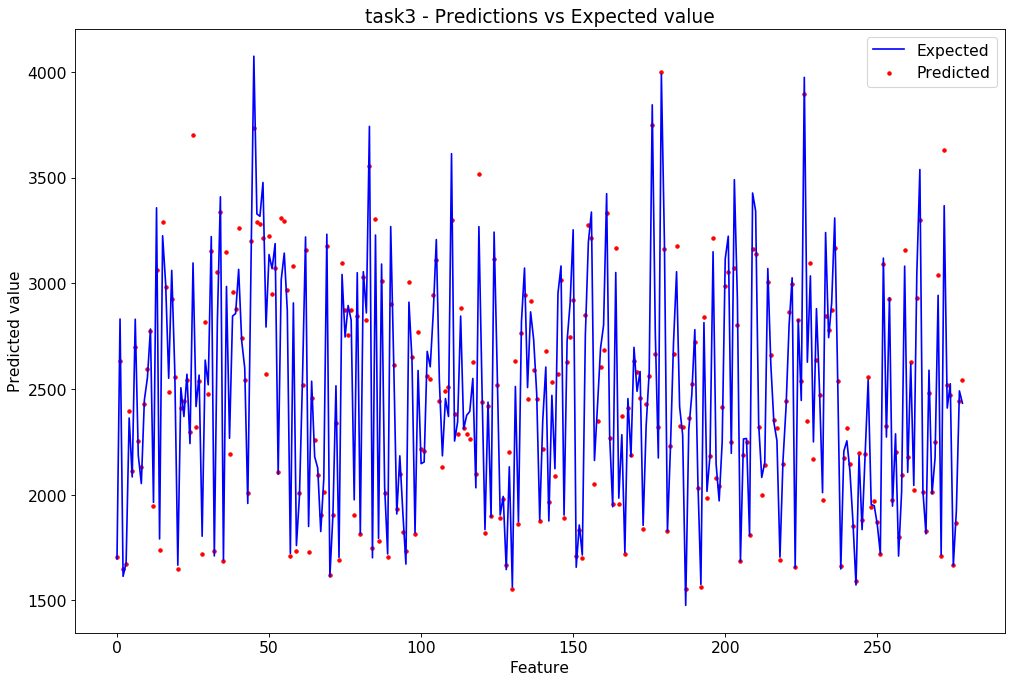

In [31]:
display_model_predict(grid, input_train_fs, target_train, filedir=filedir, taskname=taskname)

# Predict testset

In [32]:
_,predict = predict_model(grid, input_train_fs, target_train, input_test_fs)
save_prediction(predict, filedir, taskname)
print(predict)

[3196.636624   3078.29095678 3208.76509423 3133.78224506 2882.00507788
 2505.92910217 2423.13837748 3386.29476565 3109.79107279 3264.77070304
 3218.71688313 3363.4289371  2963.93139371 2885.19423436 2453.97446924
 3120.24611794 3285.81287121 3202.32959735 2698.14259992 3296.97106297
 2902.44260982 3060.34541764 3226.88099795 3273.14144128 2980.75469656
 3163.69541642 3435.35272826 2363.18448713 3182.08529868 3257.80402691
 3613.23845682 2889.13349045 3087.04031878 3823.14521758 3429.8532259
 3085.08183896 3360.40449446 2816.29925086 3115.64935493 2897.73233731
 2647.06980132 3447.54522094 3063.93744446 3343.97593416 3441.40258806
 3085.22664188 2527.38263103 2818.76353294 2882.91309529 2359.22878022
 3131.05412978 3554.65907735 3097.40673505 2473.76612509 2923.76440007
 3121.73346213 2612.75809836 3276.93321554 3419.01408365 3142.02597322
 3118.29794841 3614.08602528 2966.32727146 3112.6651358  3716.29958844
 3337.2693814  3220.95974447 3153.23087514 2965.16643177 3263.44471587
 2558.5